 ## step1.ipynb

This notebook implements parts of the first step in the 5/28/18 plan.  
The first part of the plan (e.g. implementation of `double_sigma` units with sharpen ports) was tested in ../tests/test10.ipynb .

By `Sergio Verduzco`  
June 2018

### First part
Recreate the simulation in the __test 4__ section of test10.ipynb, this time using the ei_network framework.

__Proceed here directly after reset.__

The `sharpen` port will be 2, and the `rdc` port will be 0, where e,i inputs will arrive. Inputs arrive at port 1. 
Inputs to the sharpen port are set manually (without ei_net methods).


In [ ]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

In [ ]:
# create the network using the ei_network tools
layers = ['L', 'shrp']  # L is the layer, shrp is the extra input to the sharpen port
ei_net = ei_network(layers)

In [ ]:
# Configure layer parameters
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
#----------------------------------
L.set_param('e_pars', 'type', unit_types.sds_n_sharp)
L.set_param('e_pars', 'slope_min', 6.)
L.set_param('e_pars', 'slope_wid', .1)
L.set_param('e_pars', 'thresh_min', .3)
L.set_param('e_pars', 'thresh_wid', 0.1)
L.set_param('e_pars', 'n_ports', 4)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.5, 0.5], 'slopes' : 4, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 2.)
L.set_param('e_pars', 'tau_thr', .002)
L.set_param('e_pars', 'rdc_port', 1)
L.set_param('e_pars', 'thr_fix', 0.)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 3)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 8)
L.set_param('e_geom', 'columns', 8)
L.set_param('i_geom', 'rows', 4)
L.set_param('i_geom', 'columns', 4)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1., 'high' : -.1}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 5) 
L.set_param('x_geom', 'columns', 5) 
L.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
L.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
L.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#-----------------------------------
# specifying input ports
L.set_param('ee_syn', 'inp_ports', 1) # ee should be at input 0 for trdc units
L.set_param('xe_syn', 'inp_ports', 2)
#L.set_param('xi_syn', 'inp_ports', 1)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using BCM EE synapses")
L.set_param('ee_syn', 'type', synapse_types.bcm)
L.set_param('ee_syn', 'lrate', 1./100.)
#L.set_param('ee_syn', 'omega', 2.)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./20.)
L.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
L.annotate("Using anti_cov_pre EI synapses")
L.set_param('ei_syn', 'type', synapse_types.anticov_pre)
L.set_param('ei_syn', 'lrate', .02)
#----------------------------------
shrp.annotate("Leaving a single input unit in the layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 1)
shrp.set_param('x_geom', 'columns', 1)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
#----------------------------------

In [ ]:
# Add interlayer connections
ei_net.add_connection(('shrp','x'), ('L','e'))

In [ ]:
# Configure interlayer connections
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 1., 'high': 1.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 1.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])

In [ ]:
# Build the network
ei_net.build()

In [ ]:
# Creating input patterns
## The patterns of L.x
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, port=0, random=False):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]

## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.


def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'L' : inp_pat, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }

In [ ]:
# Simulating
n_pres = 8
pres_time = 2.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

In [ ]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [ ]:
ei_net.double_anim(L.e, slider=False, interv=20, nbins=20, thr=0.5, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 5  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 10  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
ei_net.hist_anim(L.e)

### Second part
Represent combinations of 2 localized 1D layers using the middle layer. 

Test representations using the angle of the activity vectors. At the end of the presentation, when the layer activity has settled, you take the activity vector of the middle layer.
* Activity vectors with the same input pattern should have small angles, and the std. dev. of the angles around the mean should be small.
* Activity vectors from different inputs should have larger angles, e.g. their normalized inner products should be small.

__Proceed here directly after reset.__



In [1]:
# import the ei_network class and draculab
%cd ..
from ei_network import *

/home/z/projects/draculab


In [23]:
# This is the name of the file where logging will happen
log_file = "./logs/step1p2" + time.strftime("_%m-%d-%y.txt")

In [24]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [25]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [3]:
# create the network using the ei_network tools
layers = ['L', 'shrp','I1', 'I2']  # L is the layer, shrp is the extra input to the sharpen port, I1,2 are the input layers
ei_net = ei_network(layers)

In [4]:
# Configure layer parameters

ei_net.annotate('Configuration for sig_trdc in L.e')
L = ei_net.layers['L']
shrp = ei_net.layers['shrp']
I1 = ei_net.layers['I1']
I2 = ei_net.layers['I2']

#----------------------------------
L.annotate("Configuration of units in layer L.")
L.set_param('e_pars', 'type', unit_types.sig_trdc)
L.set_param('e_pars', 'slope_min', 1.7)
L.set_param('e_pars', 'slope_wid', .5)
L.set_param('e_pars', 'thresh_min', 0.)
L.set_param('e_pars', 'thresh_wid', 0.5)
L.set_param('e_pars', 'tau_min', 0.1)
L.set_param('e_pars', 'tau_wid', 0.3)
L.set_param('e_pars', 'n_ports', 2)
L.set_param('e_pars', 'branch_params', {'branch_w' : [0.3, 0.7], 'slopes' : 3, 'threshs' : 0.1})
L.set_param('e_pars', 'tau_slow', 10.)
L.set_param('e_pars', 'tau_fast', 0.05)
L.set_param('e_pars', 'c', 3.)
L.set_param('e_pars', 'tau_scale', .008)
L.set_param('e_pars', 'tau_relax', 10.)
L.set_param('e_pars', 'Kp', .02)
L.set_param('e_pars', 'tau_thr', .01)
L.set_param('e_pars', 'rdc_port', 0)
L.set_param('e_pars', 'hr_port', 0)
L.set_param('e_pars', 'thr_fix', 0.1)
L.set_param('e_pars', 'tau_fix', 0.1)
L.set_param('e_pars', 'sharpen_port', 2)
#----------------------------------
L.annotate("Adjusting size of e,i groups.")
L.set_param('e_geom', 'rows', 10)
L.set_param('e_geom', 'columns', 10)
L.set_param('i_geom', 'rows', 5)
L.set_param('i_geom', 'columns', 5)
L.set_param('e_geom', 'jitter', 0.)
L.set_param('i_geom', 'jitter', 0.)
L.annotate("Compensating for the ratio of excitatory to inhibitory units.")
L.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
L.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -.2}})
L.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})

#----------------------------------
L.annotate("Setting input parameters")
L.set_param('x_geom', 'rows', 0) # no input units in layer L
#-----------------------------------
# specifying local input ports
L.set_param('ee_syn', 'inp_ports', 0)
L.set_param('ie_syn', 'inp_ports', 0)
#----------------------------------
L.annotate("Using Oja input synapses")
L.set_param('xe_syn', 'type', synapse_types.oja)
L.set_param('xe_syn', 'lrate', 1./100.)
L.set_param('xi_syn', 'type', synapse_types.oja)
L.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
L.annotate("Using sq_hebbsnorm EE synapses")
L.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
L.set_param('ee_syn', 'lrate', 1./100.)
L.set_param('ee_syn', 'omega', 1.8)
#----------------------------------
L.annotate("Using corr_homeo_inhib IE synapses")
L.set_param('ie_syn', 'type', synapse_types.corr_inh)
L.set_param('ie_syn', 'lrate', 1./40.)
L.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
L.annotate("Using static EI synapses")
L.set_param('ei_syn', 'type', synapse_types.static)
#----------------------------------
shrp.annotate("Leaving no units in the shrp layer")
shrp.set_param('e_geom', 'rows', 0)
shrp.set_param('i_geom', 'rows', 0)
shrp.set_param('x_geom', 'rows', 0)
#----------------------------------
shrp.annotate("Configuring sharpening unit")
shrp.set_param('x_pars', 'function', lambda x : None)
shrp.set_param('x_pars', 'init_val', 1.)
shrp.set_param('x_pars', 'coordinates', np.array([0.,0.]))
#----------------------------------
I1.annotate("Configuration of I1 geometry")
I1.set_param('e_geom', 'rows', 0)
I1.set_param('i_geom', 'rows', 0)
I1.set_param('x_geom', 'rows', 8)
I1.set_param('x_geom', 'columns', 1)
I1.set_param('x_geom', 'extent', [.5, 1.])
I1.set_param('x_geom', 'center', [-.7, 0.])
#----------------------------------
I2.annotate("Configuration of I2 geometry")
I2.set_param('e_geom', 'rows', 0)
I2.set_param('i_geom', 'rows', 0)
I2.set_param('x_geom', 'rows', 1)
I2.set_param('x_geom', 'columns', 8)
I2.set_param('x_geom', 'extent', [1., .5])
I2.set_param('x_geom', 'center', [0., .7])
#----------------------------------
L.set_param('n', 'w_track', 16)
shrp.set_param('n', 'w_track', 0)
I1.set_param('n', 'w_track', 0)
I2.set_param('n', 'w_track', 0)
#----------------------------------

In [5]:
# Add interlayer connections
"""ei_net.add_connection(('shrp','x'), ('L','e'))"""
ei_net.add_connection(('I1','x'), ('L','e'))
ei_net.add_connection(('I1','x'), ('L','i'))
ei_net.add_connection(('I2','x'), ('L','e'))
ei_net.add_connection(('I2','x'), ('L','i'))

In [6]:
# Configure interlayer connections
"""
ei_net.set_param('shrpx_Le_conn', 'mask',{'circular': {'radius': 10.}})
ei_net.set_param('shrpx_Le_conn', 'kernel', 1.)
ei_net.set_param('shrpx_Le_conn', 'weights', {'uniform' : {'low': 0., 'high': 0.}})
ei_net.set_param('shrpx_Le_syn', 'init_w', 0.)
ei_net.set_param('shrpx_Le_syn', 'inp_ports', L.e_pars['sharpen_port'])
"""
ei_net.set_param('I1x_Le_conn', 'connection_type', 'convergent')
ei_net.set_param('I1x_Le_conn', 'number_of_connections', 2)
ei_net.set_param('I1x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I1x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
ei_net.set_param('I1x_Le_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Le_conn', 'edge_wrap', False)
ei_net.set_param('I1x_Le_syn', 'inp_ports', 1)
ei_net.set_param('I1x_Le_syn', 'type', synapse_types.bcm)
ei_net.set_param('I1x_Le_syn', 'lrate', 1./50.)
ei_net.set_param('I1x_Le_syn', 'omega', 1.5)

ei_net.set_param('I1x_Li_conn', 'connection_type', 'convergent')
ei_net.set_param('I1x_Li_conn', 'number_of_connections', 2)
ei_net.set_param('I1x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I1x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I1x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
ei_net.set_param('I1x_Li_conn', 'dist_dim', 'y')
ei_net.set_param('I1x_Li_conn', 'edge_wrap', False)

ei_net.set_param('I2x_Le_conn', 'connection_type', 'convergent')
ei_net.set_param('I2x_Le_conn', 'number_of_connections', 2)
ei_net.set_param('I2x_Le_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Le_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I2x_Le_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : .9}})
ei_net.set_param('I2x_Le_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Le_syn', 'inp_ports', 1)
ei_net.set_param('I2x_Le_syn', 'type', synapse_types.bcm)
ei_net.set_param('I2x_Le_syn', 'lrate', 1./50.)
ei_net.set_param('I2x_Le_syn', 'omega', 1.5)

ei_net.set_param('I2x_Li_conn', 'connection_type', 'convergent')
ei_net.set_param('I2x_Li_conn', 'number_of_connections', 2)
ei_net.set_param('I2x_Li_conn', 'mask', {'circular': {'radius': 5.}})
ei_net.set_param('I2x_Li_conn', 'kernel', {'linear' : {'c': 1., 'a': 0.5}})
ei_net.set_param('I2x_Li_conn', 'weights', {'uniform' : {'low' : 0.2, 'high' : 0.5}})
ei_net.set_param('I2x_Li_conn', 'dist_dim', 'x')
ei_net.set_param('I2x_Li_conn', 'edge_wrap', False)


In [7]:
# Build the network
ei_net.build()

Building layer I2
Building layer L


/home/z/projects/draculab/topology.py:286: UserWarning: topo_connect received an empty list as an argument
  warn('topo_connect received an empty list as an argument', UserWarning)


Building layer shrp
Building layer I1


Creating I1x_Le connection
Creating I1x_Li connection
Creating I2x_Le connection
Creating I2x_Li connection


In [26]:
#================ INPUT CONFIGURATION =================
n_pat1 = I1.n['x']  # number of input patterns for I1 is number of input units
n_pat2 = I2.n['x']  # number of input patterns for I2 is number of input units
pats1 = [] # here we'll store id's for the patterns presented by inp_pat1
pats2 = [] # here we'll store id's for the patterns presented by inp_pat2
i_nums = np.random.permutation(n_pat1*n_pat2)
idx_list1 = [int(np.floor(n/n_pat2)) for n in i_nums]
idx_list2 = [int(round(n%n_pat2)) for n in i_nums]

def inp_pat1(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I1
    if random:
        if pres < 930:
            idx = np.random.randint(n_pat1)
        else:
            idx = idx_list1[pres%len(idx_list1)]
    else:
        idx = pres % n_pat1
    pats1.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat1)) for x in range(n_pat1)]
    
def inp_pat2(pres, rows, columns, port=0, random=True):
    # The function that creates the input pattern for I2
    if random:
        if pres < 930:
            idx = np.random.randint(n_pat2)
        else:
            idx = idx_list2[pres%len(idx_list2)]
    else:
        idx = pres % n_pat2
    pats2.append(idx)
    return [0.5*(1. + np.cos(2.*np.pi*(x - idx)/n_pat2)) for x in range(n_pat2)]
    
## The pattern of shrp.x is irrelevant, we set it using the set_inp_fun argument
shrp_inp_pat = lambda p, r, c : 1.

def make_shrp_fun(prev_pat, cur_pat, init_time, pres_time, inp_units):
    eps = .1 # distance to the input change where sharpening is released
    return lambda t : 0. if (t < init_time+eps or t > init_time+pres_time-eps) else 1.
    #return lambda t: 1.

def set_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units):
    for unit in inp_units:
            unit.set_function( make_shrp_fun(pre_inp, cur_inp, init_time, pres_time, inp_units) )

inp_pat_dic = {'I1' : inp_pat1, 'I2' : inp_pat2, 'shrp' : shrp_inp_pat}
inp_fun_dic = {'shrp' : set_shrp_fun }
#======================================================


In [27]:
%%capture capt2
# The cell above does input configuration, and this should capture it in 'capt2'
%history -l 1

In [28]:
# Write the input configuration two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt2.stdout)
f.close()

In [9]:
# Simulating
n_pres = 1000
pres_time = 1.
    
ei_net.run(n_pres, pres_time, set_inp_pat=inp_pat_dic, set_inp_fun=inp_fun_dic)

Starting presentation 0
Presentation 0 took 12.04792308807373 seconds 
Starting presentation 1
Presentation 1 took 30.295034885406494 seconds 
Starting presentation 2
Presentation 2 took 12.016324281692505 seconds 
Starting presentation 3
Presentation 3 took 12.024457216262817 seconds 
Starting presentation 4
Presentation 4 took 11.932704210281372 seconds 
Starting presentation 5
Presentation 5 took 12.051623106002808 seconds 
Starting presentation 6
Presentation 6 took 11.984909534454346 seconds 
Starting presentation 7
Presentation 7 took 12.026423215866089 seconds 
Starting presentation 8
Presentation 8 took 12.006567478179932 seconds 
Starting presentation 9
Presentation 9 took 11.983622074127197 seconds 
Starting presentation 10
Presentation 10 took 12.008094072341919 seconds 
Starting presentation 11
Presentation 11 took 11.974395513534546 seconds 
Starting presentation 12
Presentation 12 took 12.06134295463562 seconds 
Starting presentation 13
Presentation 13 took 11.98520016670

Presentation 111 took 12.19821810722351 seconds 
Starting presentation 112
Presentation 112 took 12.24049711227417 seconds 
Starting presentation 113
Presentation 113 took 12.286413192749023 seconds 
Starting presentation 114
Presentation 114 took 12.177442789077759 seconds 
Starting presentation 115
Presentation 115 took 12.374314785003662 seconds 
Starting presentation 116
Presentation 116 took 12.321635484695435 seconds 
Starting presentation 117
Presentation 117 took 12.267979383468628 seconds 
Starting presentation 118
Presentation 118 took 12.274465084075928 seconds 
Starting presentation 119
Presentation 119 took 12.347614049911499 seconds 
Starting presentation 120
Presentation 120 took 12.227213859558105 seconds 
Starting presentation 121
Presentation 121 took 12.284991264343262 seconds 
Starting presentation 122
Presentation 122 took 12.206079959869385 seconds 
Starting presentation 123
Presentation 123 took 12.114090919494629 seconds 
Starting presentation 124
Presentation 1

Presentation 220 took 11.936237812042236 seconds 
Starting presentation 221
Presentation 221 took 12.004868984222412 seconds 
Starting presentation 222
Presentation 222 took 12.235515594482422 seconds 
Starting presentation 223
Presentation 223 took 12.09837293624878 seconds 
Starting presentation 224
Presentation 224 took 11.996877431869507 seconds 
Starting presentation 225
Presentation 225 took 11.894246816635132 seconds 
Starting presentation 226
Presentation 226 took 12.179869651794434 seconds 
Starting presentation 227
Presentation 227 took 12.015368938446045 seconds 
Starting presentation 228
Presentation 228 took 12.081112384796143 seconds 
Starting presentation 229
Presentation 229 took 12.135642290115356 seconds 
Starting presentation 230
Presentation 230 took 12.013789415359497 seconds 
Starting presentation 231
Presentation 231 took 11.913952589035034 seconds 
Starting presentation 232
Presentation 232 took 11.944333553314209 seconds 
Starting presentation 233
Presentation 

Presentation 329 took 12.122606039047241 seconds 
Starting presentation 330
Presentation 330 took 11.874061346054077 seconds 
Starting presentation 331
Presentation 331 took 12.215134382247925 seconds 
Starting presentation 332
Presentation 332 took 12.181279420852661 seconds 
Starting presentation 333
Presentation 333 took 12.070330619812012 seconds 
Starting presentation 334
Presentation 334 took 12.024209022521973 seconds 
Starting presentation 335
Presentation 335 took 12.154426336288452 seconds 
Starting presentation 336
Presentation 336 took 11.982152938842773 seconds 
Starting presentation 337
Presentation 337 took 11.966810703277588 seconds 
Starting presentation 338
Presentation 338 took 11.771803379058838 seconds 
Starting presentation 339
Presentation 339 took 12.035573244094849 seconds 
Starting presentation 340
Presentation 340 took 11.957220077514648 seconds 
Starting presentation 341
Presentation 341 took 12.021113634109497 seconds 
Starting presentation 342
Presentation

Presentation 438 took 12.0084388256073 seconds 
Starting presentation 439
Presentation 439 took 11.96890664100647 seconds 
Starting presentation 440
Presentation 440 took 12.14070749282837 seconds 
Starting presentation 441
Presentation 441 took 11.757649898529053 seconds 
Starting presentation 442
Presentation 442 took 21.908080577850342 seconds 
Starting presentation 443
Presentation 443 took 12.02971601486206 seconds 
Starting presentation 444
Presentation 444 took 12.082667827606201 seconds 
Starting presentation 445
Presentation 445 took 12.123344898223877 seconds 
Starting presentation 446
Presentation 446 took 12.005746841430664 seconds 
Starting presentation 447
Presentation 447 took 12.111486911773682 seconds 
Starting presentation 448
Presentation 448 took 11.9170560836792 seconds 
Starting presentation 449
Presentation 449 took 12.031150579452515 seconds 
Starting presentation 450
Presentation 450 took 12.118180274963379 seconds 
Starting presentation 451
Presentation 451 to

Presentation 547 took 12.067420959472656 seconds 
Starting presentation 548
Presentation 548 took 12.135776996612549 seconds 
Starting presentation 549
Presentation 549 took 11.977123498916626 seconds 
Starting presentation 550
Presentation 550 took 12.073764085769653 seconds 
Starting presentation 551
Presentation 551 took 12.060014486312866 seconds 
Starting presentation 552
Presentation 552 took 11.931829452514648 seconds 
Starting presentation 553
Presentation 553 took 12.125177145004272 seconds 
Starting presentation 554
Presentation 554 took 12.041398286819458 seconds 
Starting presentation 555
Presentation 555 took 28.80393624305725 seconds 
Starting presentation 556
Presentation 556 took 11.942513465881348 seconds 
Starting presentation 557
Presentation 557 took 11.93830394744873 seconds 
Starting presentation 558
Presentation 558 took 11.93718957901001 seconds 
Starting presentation 559
Presentation 559 took 12.204982280731201 seconds 
Starting presentation 560
Presentation 56

Presentation 656 took 12.257567167282104 seconds 
Starting presentation 657
Presentation 657 took 12.09217643737793 seconds 
Starting presentation 658
Presentation 658 took 12.035042524337769 seconds 
Starting presentation 659
Presentation 659 took 12.106816291809082 seconds 
Starting presentation 660
Presentation 660 took 12.07323694229126 seconds 
Starting presentation 661
Presentation 661 took 12.071143388748169 seconds 
Starting presentation 662
Presentation 662 took 11.860247135162354 seconds 
Starting presentation 663
Presentation 663 took 11.86371636390686 seconds 
Starting presentation 664
Presentation 664 took 30.5966854095459 seconds 
Starting presentation 665
Presentation 665 took 12.091727256774902 seconds 
Starting presentation 666
Presentation 666 took 12.043561458587646 seconds 
Starting presentation 667
Presentation 667 took 12.047652244567871 seconds 
Starting presentation 668
Presentation 668 took 12.053284883499146 seconds 
Starting presentation 669
Presentation 669 

Presentation 765 took 12.156910181045532 seconds 
Starting presentation 766
Presentation 766 took 11.965123176574707 seconds 
Starting presentation 767
Presentation 767 took 12.003212213516235 seconds 
Starting presentation 768
Presentation 768 took 12.043577194213867 seconds 
Starting presentation 769
Presentation 769 took 11.987317085266113 seconds 
Starting presentation 770
Presentation 770 took 11.828956365585327 seconds 
Starting presentation 771
Presentation 771 took 11.87565565109253 seconds 
Starting presentation 772
Presentation 772 took 11.975061655044556 seconds 
Starting presentation 773
Presentation 773 took 12.017101526260376 seconds 
Starting presentation 774
Presentation 774 took 12.071013689041138 seconds 
Starting presentation 775
Presentation 775 took 11.91374921798706 seconds 
Starting presentation 776
Presentation 776 took 12.000111818313599 seconds 
Starting presentation 777
Presentation 777 took 12.005843162536621 seconds 
Starting presentation 778
Presentation 7

Presentation 874 took 12.217889785766602 seconds 
Starting presentation 875
Presentation 875 took 12.065757989883423 seconds 
Starting presentation 876
Presentation 876 took 11.89016604423523 seconds 
Starting presentation 877
Presentation 877 took 12.225839614868164 seconds 
Starting presentation 878
Presentation 878 took 12.113717079162598 seconds 
Starting presentation 879
Presentation 879 took 11.94389820098877 seconds 
Starting presentation 880
Presentation 880 took 11.966151714324951 seconds 
Starting presentation 881
Presentation 881 took 12.038238525390625 seconds 
Starting presentation 882
Presentation 882 took 12.24768877029419 seconds 
Starting presentation 883
Presentation 883 took 11.955790519714355 seconds 
Starting presentation 884
Presentation 884 took 11.99597954750061 seconds 
Starting presentation 885
Presentation 885 took 12.025206089019775 seconds 
Starting presentation 886
Presentation 886 took 12.04800009727478 seconds 
Starting presentation 887
Presentation 887 

Presentation 983 took 12.066259384155273 seconds 
Starting presentation 984
Presentation 984 took 12.25087857246399 seconds 
Starting presentation 985
Presentation 985 took 12.247127771377563 seconds 
Starting presentation 986
Presentation 986 took 12.09067964553833 seconds 
Starting presentation 987
Presentation 987 took 12.202747106552124 seconds 
Starting presentation 988
Presentation 988 took 12.138767719268799 seconds 
Starting presentation 989
Presentation 989 took 12.08852767944336 seconds 
Starting presentation 990
Presentation 990 took 12.20166277885437 seconds 
Starting presentation 991
Presentation 991 took 12.16840648651123 seconds 
Starting presentation 992
Presentation 992 took 12.133382797241211 seconds 
Starting presentation 993
Presentation 993 took 12.17739486694336 seconds 
Starting presentation 994
Presentation 994 took 12.19411301612854 seconds 
Starting presentation 995
Presentation 995 took 12.178965330123901 seconds 
Starting presentation 996
Presentation 996 to

norm of output matrix: 39.222891
norm of input matrix: 43.979793
norm of difference between matrices: 5.988137


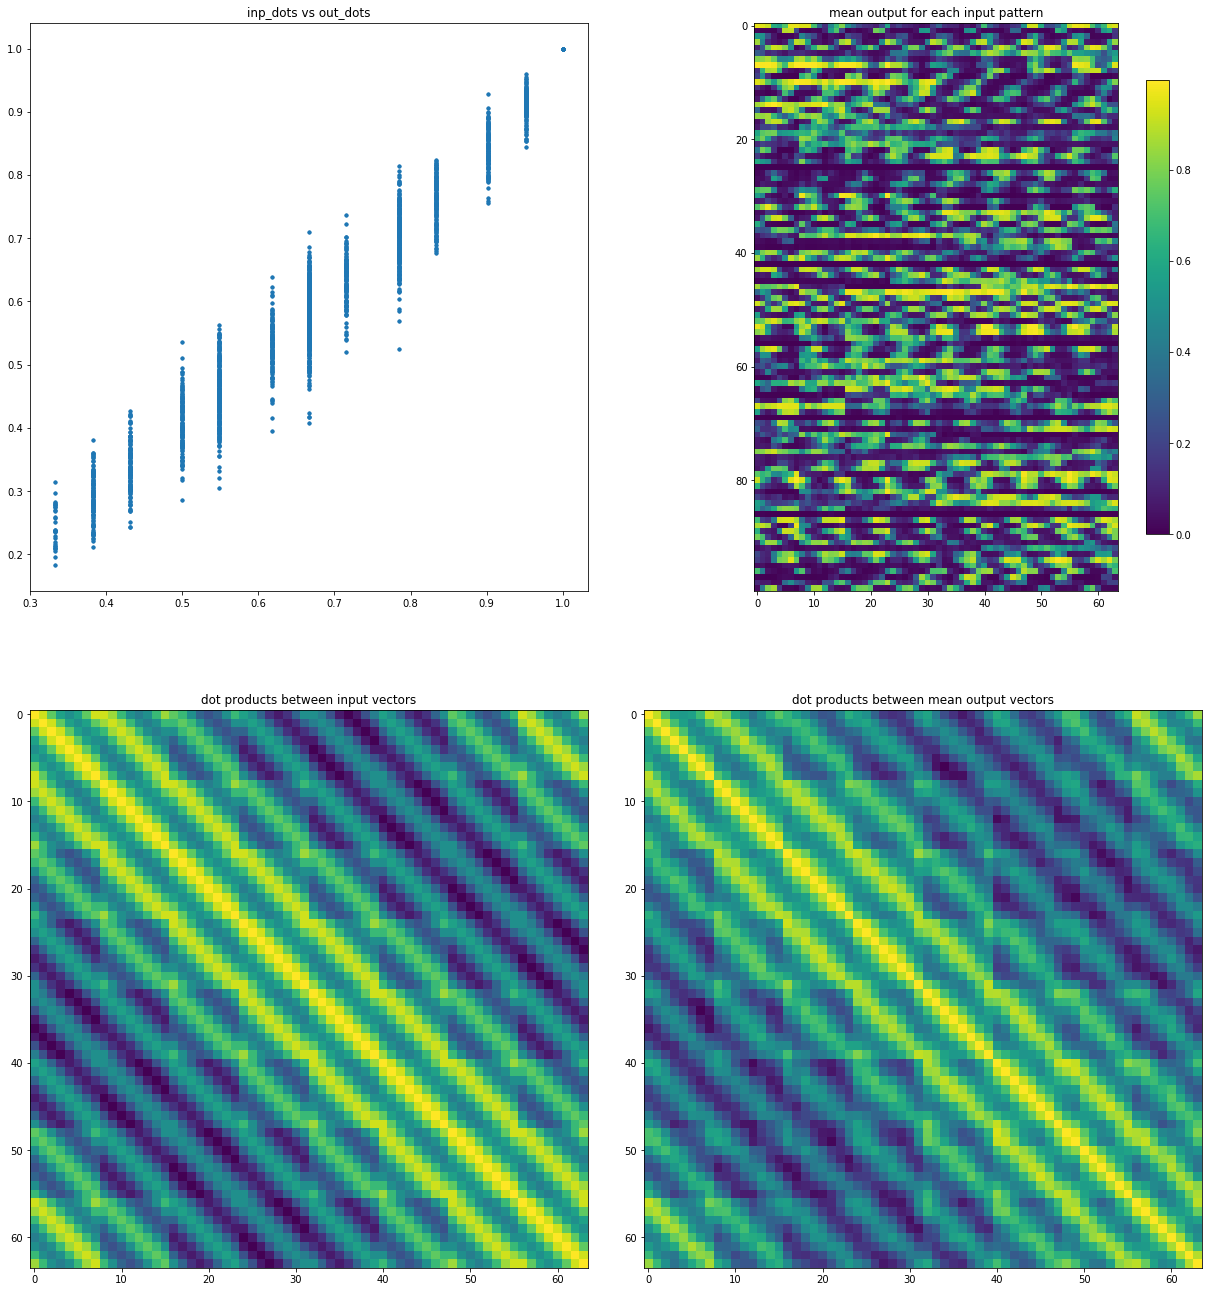

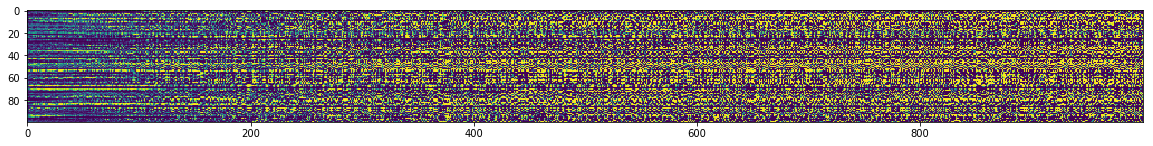

In [10]:
# Simulation analysis

## For each input presentation obtain the activity vector from layer L
ppat = int(round(pres_time/ei_net.net_params['min_delay'])) # number of data points per input pattern
pt = int(round((pres_time-0.2)/ei_net.net_params['min_delay'])) # data point where the vector will come from
e_pats = np.zeros((len(L.e), n_pres))  # array where we'll store the activity vectors
for pres in range(n_pres):
    for e_idx, idx in enumerate(L.e):
        e_pats[e_idx, pres] = ei_net.all_activs[idx, pres*ppat + pt]

# The ID of the input comes from the id's in pats1 and pats2, placed by inp_pat1 and inp_pat2 respectively.
pater1 = pats1[1:] # The first call is just for setting initial conditions; we discard its pattern
pater2 = pats2[1:] # ditto
pats = np.zeros(n_pat1*n_pat2)  # pats[n] is the number of times the pattern with ID 'n' appeared
n_pats = len(pats)
pres_pat = np.zeros(n_pres)  # pres_pat[n] is the ID of the pattern in presentation 'n'
for p in range(n_pres):
    p_id = n_pat2*pater1[p] + pater2[p] # the pattern ID 'flattens' all possible pairs of values
    pats[p_id] += 1
    pres_pat[p] = p_id


# get the mean of output patterns corresponding to the same inputs
mean_out = np.zeros((len(L.e),n_pats)) # mean_out[:,n] = mean output for input n
for pres in range(n_pres):
    mean_out[:,int(pres_pat[pres])] += e_pats[:,pres]
    
for pat in range(n_pats):
    if pats[pat] > 1:
        mean_out[:, pat] = mean_out[:, pat]/ pats[pat]
        
# Obtain the angles between any two pairs of input patterns
# get all input patterns
all_inps = np.zeros((n_pats, n_pat1+n_pat2)) # all_inps[n,:] = input pattern with ID 'n'
for p1 in range(n_pat1):
    for p2 in range(n_pat2):
        all_inps[p1*n_pat2+p2, :n_pat1] = inp_pat1(p1, 1, 1, random=False)
        all_inps[p1*n_pat2+p2, n_pat1:] = inp_pat2(p2, 1, 1, random=False)
        

# get matrices with dot products between pairs of patterns
inp_norm = np.linalg.norm(all_inps[0,:])   # all input vectors have the same norm
inp_norm2 = inp_norm*inp_norm
inp_dots = np.zeros((n_pats, n_pats))
out_dots = np.zeros((n_pats, n_pats))
for p1 in range(n_pats):
    for p2 in range(n_pats):
        inp_dots[p1,p2] = np.dot(all_inps[p1,:], all_inps[p2,:])/inp_norm2
        if pats[p1] > 0 and pats[p2] > 0: # if the two input patterns were presented
                #pres_idx1 = np.argmin(abs(pres_pat - p1))  # index of presentation where you showed pattern 1
                #pres_idx2 = np.argmin(abs(pres_pat - p2))  # index of presentation where you showed pattern 2
                #vec1 = e_pats[:,pres_idx1]  # first input vector
                #vec2 = e_pats[:,pres_idx2]  # second input vector
                vec1 = mean_out[:,p1]
                vec2 = mean_out[:,p2]
                norm1 = np.linalg.norm(vec1)
                norm2 = np.linalg.norm(vec2)
                out_dots[p1,p2] = np.dot(vec1,vec2)/(norm1*norm2)

                
# compare the angles between input patterns with the angles between output patterns
absissae = []
ordinates = []
for row in range(n_pats):
    for column in range(n_pats):
        if out_dots[row,column] > 0:
            absissae.append(inp_dots[row,column])
            ordinates.append(out_dots[row,column])
            
#plot the results of the analysis
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(21, 23))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

im0 = axes[0,0].plot(absissae, ordinates, '.')
axes[0,0].set_title('inp_dots vs out_dots')
im1 = axes[0,1].imshow(mean_out)
axes[0,1].set_title('mean output for each input pattern')
fig.colorbar(im1,ax=axes[0,1],fraction=0.1,shrink=0.8)
im2 = axes[1,0].imshow(inp_dots)
axes[1,0].set_title('dot products between input vectors')
im3 = axes[1,1].imshow(out_dots)
axes[1,1].set_title('dot products between mean output vectors')
#fig.colorbar(im3,fraction=0.1,shrink=0.8)

# plot the array of activity patterns
ex_fig = plt.figure(figsize=(20,10))
plt.imshow(e_pats)
    
# A numerical measure of how much the output representation differentiates the inputs may be the norm of (inp_dots - out_dots)
diff_norm = np.linalg.norm(inp_dots-out_dots) # will use Frobenius norm, as if they were vectors
print("norm of output matrix: %f" % (np.linalg.norm(out_dots)))
print("norm of input matrix: %f" % (np.linalg.norm(inp_dots)))
print("norm of difference between matrices: %f" % (diff_norm))

In [ ]:
%%capture capt3
# The cell above does output analysis, and this can capture it in 'capt3'
%history -l 1

In [ ]:
# Write the analysis code two cells above in the simulation log
f = open(log_file, mode='a')
f.write(capt3.stdout)
f.close()

In [ ]:
# plot the array of activity patterns, or difference matrix
%matplotlib inline
ex_fig = plt.figure(figsize=(20,20))
#plt.imshow(e_pats[:,:100])
plt.imshow(inp_dots-out_dots)
plt.colorbar()

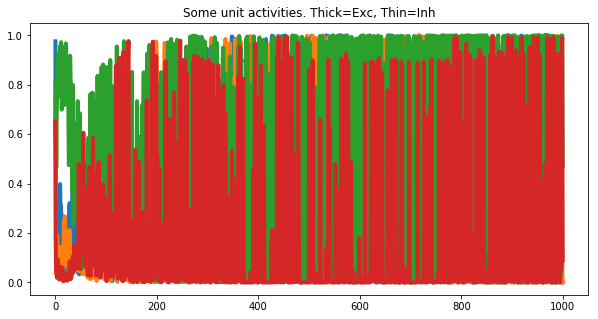

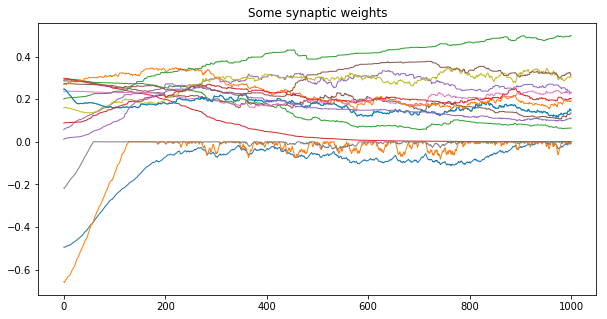

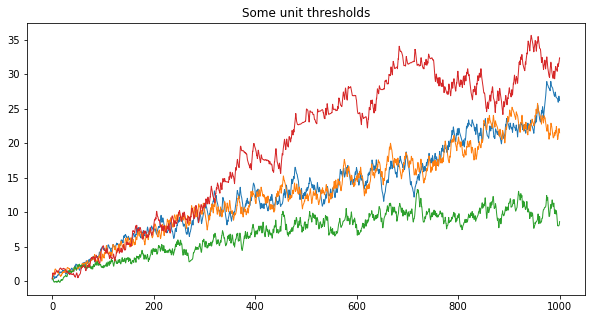

In [11]:
%matplotlib inline
ei_net.basic_plot('L')

In [ ]:
%matplotlib inline
ei_net.basic_plot('shrp')

In [22]:
ei_net.double_anim(L.e, slider=True, interv=20, nbins=20, thr=0.7, pdf=True)

interactive(children=(IntSlider(value=100000, description='frame', max=200000, min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

[ 7 47]


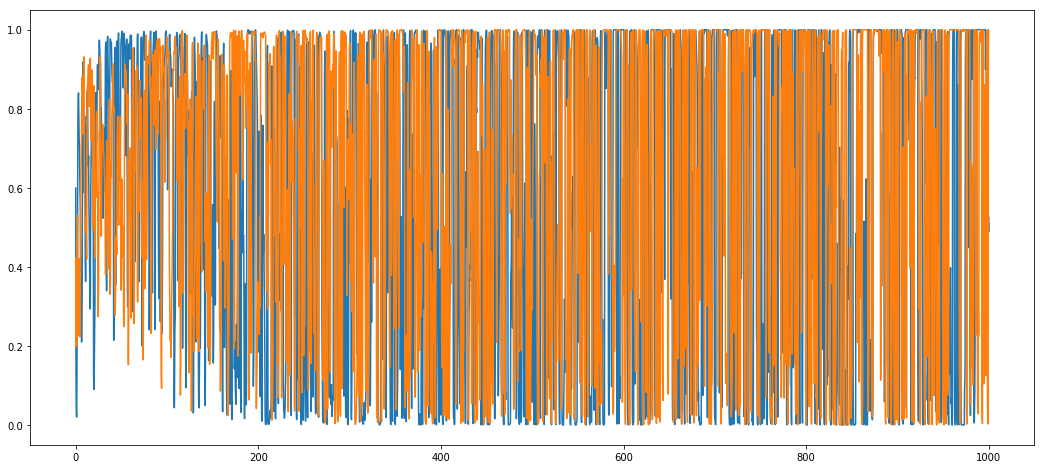

In [12]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 2  # how many units to plot
top_pop = np.array(L.e)  # population to visualize
top_units = ei_net.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_net.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_net.all_times, top_acts)
plt.show()

[56 25  2 69 42]


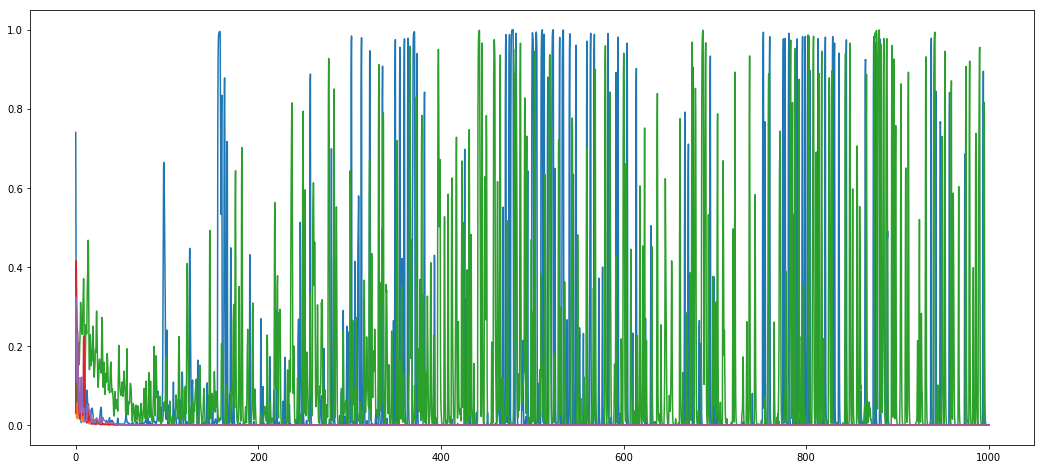

In [17]:
# Plot the lowest excitatory unit activities
n_bottom = 6  # how many units to plot
bottom_pop = np.array(L.e)  # population to visualize
bottom_units = ei_net.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_net.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_net.all_times, bottom_acts)
plt.show()

In [ ]:
# Visualize the connections
ei_net.conn_anim(I1.x+I2.x, L.e, slider=True)
#ei_net.conn_anim(L.e, L.e, slider=True)

In [29]:
# Annotations and log
ei_net.annotate("This simulation takes the parameters used for the sigmoidal in the previous simulation, and uses them")
ei_net.annotate("for sig_trdc units. The network is probably better than anything I found with sigmoidals, (norm of ")
ei_net.annotate("difference matrices is around 6), but the")
ei_net.annotate("rate distributions that eventually settle in (after 200 or so presentations) are not exponential; they")
ei_net.annotate("are bimodal, with all rates concentrated around 0 or 1 (U shaped). This may be related to the")
ei_net.annotate("inconsistently high desired value of the homeostatic inhibition, and also it should be related to the")
ei_net.annotate("propensity of EE connections and BCM inputs to form activity clusters.")
#ei_net.annotate("stop growing.", make_history=False)
ei_net.log(name=log_file,params=False)

In [30]:
ei_net.save('step1p2_sig_trdc1.pkl')